In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [103]:
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv('cleaned_results.csv')
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1969-11-01,Italy,France,1,0,Euro,Novara,Italy,False
1,1969-11-01,Denmark,England,4,3,Euro,Aosta,Italy,True
2,1969-11-02,England,France,2,0,Euro,Turin,Italy,True
3,1969-11-02,Italy,Denmark,3,1,Euro,Turin,Italy,False
4,1975-08-25,Thailand,Australia,3,2,AFC Championship,Hong Kong,Hong Kong,True
...,...,...,...,...,...,...,...,...,...
4879,2022-07-22,Sweden,Belgium,1,0,UEFA Euro,Leigh,Sweden,True
4880,2022-07-23,France,Netherlands,1,0,UEFA Euro,Rotherham,France,True
4881,2022-07-26,England,Sweden,4,0,UEFA Euro,Sheffield,England,False
4882,2022-07-27,Germany,France,2,1,UEFA Euro,Milton Keynes,Germany,True


In [55]:
df['date'].dtype

dtype('<M8[ns]')

Histogram for Home score values

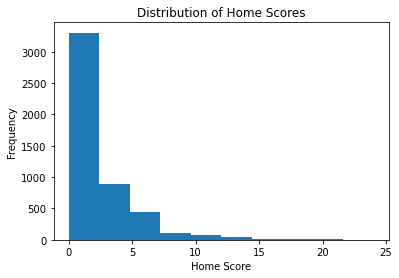

In [10]:
plt.hist(df['home_score'], bins=10)
plt.xlabel('Home Score')
plt.ylabel('Frequency')
plt.title('Distribution of Home Scores')
plt.show()

Statistical Analysis

In [11]:
home_score_mean = df['home_score'].mean()
home_score_median = df['home_score'].median()

print("Home score mean value : ", home_score_mean)
print("Home score median value : ", home_score_median)

Home score mean value :  2.272727272727273
Home score median value :  1.0


Bar plot for different Tournaments

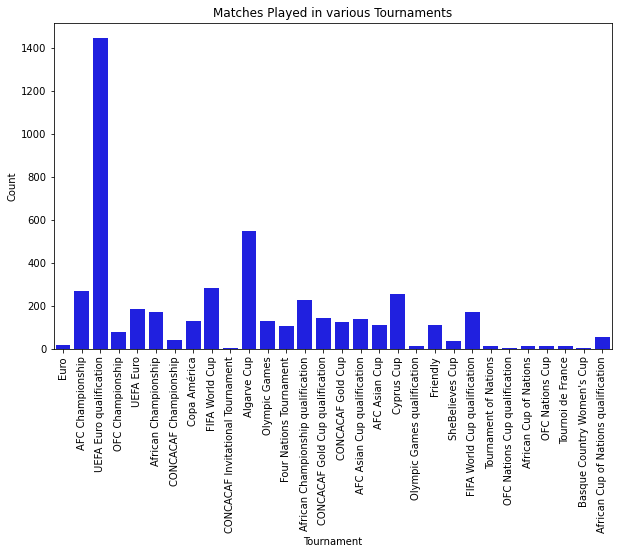

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='tournament', data=df, color='blue')
plt.xticks(rotation=90)
plt.xlabel('Tournament')
plt.ylabel('Count')
plt.title('Matches Played in various Tournaments')
plt.show()

In [16]:
# Identify the team with the most wins
winning_teams = df.loc[df['home_score'] > df['away_score'], 'home_team']
winning_teams


0          Italy
1        Denmark
2        England
3          Italy
4       Thailand
          ...   
4879      Sweden
4880      France
4881     England
4882     Germany
4883     England
Name: home_team, Length: 2565, dtype: object

In [17]:
winning_team_counts = winning_teams.value_counts()
winning_team_counts

United States           229
Germany                 122
China PR                116
Norway                  116
Sweden                  107
                       ... 
Palestine                 1
Benin                     1
Armenia                   1
Netherlands Antilles      1
Réunion                   1
Name: home_team, Length: 163, dtype: int64

In [18]:
most_wins_team = winning_team_counts.idxmax()
print("The most Winning Team is : ", most_wins_team )

The most Winning Team is :  United States


In [25]:
# Top five winning teams
winning_team_counts.head(5)

United States    229
Germany          122
China PR         116
Norway           116
Sweden           107
Name: home_team, dtype: int64

Team with the Hhighest goal scored

In [42]:
home_Score = df.groupby('home_team')['home_score'].sum()
away_Score = df.groupby('home_team')['away_score'].sum()
total_score = home_Score+away_Score
total_score = total_score.sort_values(ascending=False)
total_score

home_team
United States           1053
China PR                 647
Norway                   613
Germany                  609
Sweden                   548
                        ... 
Mauritania                 1
Curaçao                    1
Basque Country             1
Netherlands Antilles       1
Western Australia          1
Length: 198, dtype: int64

Best players of the Era

In [70]:
df_60s = df[(df['date'].dt.year>=1960) & (df['date'].dt.year<=1969)]
df_70s = df[(df['date'].dt.year>=1970) & (df['date'].dt.year<=1979)]
df_80s = df[(df['date'].dt.year>=1980) & (df['date'].dt.year<=1989)]
df_90s = df[(df['date'].dt.year>=1990) & (df['date'].dt.year<=1999)]
df_2000s = df[(df['date'].dt.year>=2000) & (df['date'].dt.year<=2009)]
df_2010s = df[(df['date'].dt.year>=2010) & (df['date'].dt.year<=2019)]
df_2020s = df[(df['date'].dt.year>=2020) & (df['date'].dt.year<=2029)]

In [96]:
def best_team(df, era):
    winning_teams = df.loc[df['home_score'] > df['away_score'], 'home_team']
    print("Top 5 winning teams of the ", era,"s :" )
    print(winning_teams.head(5).values)
    
    print("-----------------------------------------------------------------")
    
    home_Score = df.groupby('home_team')['home_score'].sum()
    away_Score = df.groupby('home_team')['away_score'].sum()
    total_score = home_Score+away_Score
    total_score = total_score.sort_values(ascending=False)
    
    print("Top 5 teams with the highest scores in the ", era, "s : ")
    print(total_score.head(5).index.values)
    
    print("=================================================================")

In [97]:
best_team(df_60s, "60")
best_team(df_70s, "70")
best_team(df_80s, "80")
best_team(df_90s, "90")
best_team(df_2000s, "2000")
best_team(df_2010s, "2010")
best_team(df_2020s, "2020")

Top 5 winning teams of the  60 s :
['Italy' 'Denmark' 'England' 'Italy']
-----------------------------------------------------------------
Top 5 teams with the highest scores in the  60 s : 
['Denmark' 'Italy' 'England']
Top 5 winning teams of the  70 s :
['Thailand' 'Thailand' 'New Zealand' 'Australia' 'New Zealand']
-----------------------------------------------------------------
Top 5 teams with the highest scores in the  70 s : 
['Thailand' 'Taiwan' 'Italy' 'New Zealand' 'Australia']
Top 5 winning teams of the  80 s :
['India S' 'India S' 'Taiwan' 'Western Australia' 'India N']
-----------------------------------------------------------------
Top 5 teams with the highest scores in the  80 s : 
['Thailand' 'Taiwan' 'England' 'Sweden' 'Italy']
Top 5 winning teams of the  90 s :
['Italy' 'England' 'Denmark' 'Switzerland' 'Finland']
-----------------------------------------------------------------
Top 5 teams with the highest scores in the  90 s : 
['Norway' 'China PR' 'Brazil' 'Japan

Advantage of Playing at home

In [98]:
home_wins = df.loc[df['home_score'] > df['away_score']]
away_wins = df.loc[df['home_score'] < df['away_score']]
draws = df.loc[df['home_score'] == df['away_score']]
home_advantage = (len(home_wins) / len(df)) * 100
away_advantage = (len(away_wins) / len(df)) * 100
draw_percentage = (len(draws) / len(df)) * 100

print("Home advantage percentage : ", home_advantage, "%")
print("Away advantage percentage : ", away_advantage, "%")
print("Draw percentage : ", draw_percentage, "%" )

Home advantage percentage :  52.518427518427515 %
Away advantage percentage :  33.435708435708435 %
Draw percentage :  14.045864045864045 %


New Countries over the years

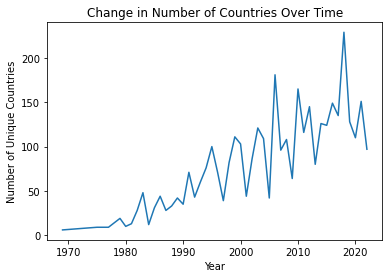

In [104]:
df['year'] = df['date'].dt.year
unique_countries_by_year = df.groupby('year')['home_team', 'away_team'].nunique().sum(axis=1)

plt.plot(unique_countries_by_year.index, unique_countries_by_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Unique Countries')
plt.title('Change in Number of Countries Over Time')
plt.show()